In [1830]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [1831]:
df = pd.read_csv("cars_engage_2022.csv") #Data Loading
df


,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [1832]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

#### Checking for missing or null values


In [1833]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [1834]:
df.Boot_Space

0        110 litres
1        110 litres
2        110 litres
3         94 litres
4        110 litres
           ...     
1271     510 litres
1272     510 litres
1273     510 litres
1274     510 litres
1275    1050 litres
Name: Boot_Space, Length: 1276, dtype: object

#### Removing unit so we can convert to numeric type from object dtype

In [1835]:
df.Boot_Space=df.Boot_Space.str.replace('litres',' ')


In [1836]:
df.Boot_Space


0        110  
1        110  
2        110  
3         94  
4        110  
         ...  
1271     510  
1272     510  
1273     510  
1274     510  
1275    1050  
Name: Boot_Space, Length: 1276, dtype: object

In [1837]:
df.Boot_Space=pd.to_numeric(df.Boot_Space,errors='coerce')

In [1838]:
df.Boot_Space

0        110.0
1        110.0
2        110.0
3         94.0
4        110.0
         ...  
1271     510.0
1272     510.0
1273     510.0
1274     510.0
1275    1050.0
Name: Boot_Space, Length: 1276, dtype: float64

In [1839]:
df.Make

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [1840]:
df.Make.value_counts()

Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Make, dtype: int64

In [1841]:
df.Make.fillna('Mercedes',inplace=True)

In [1842]:
df.isnull().sum()

Unnamed: 0              0
Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [1843]:
for i in range(883,892):
    df2['Make'][i]='Datsun'

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/1196248880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Make'][i]='Datsun'


In [1844]:
for i in range(349,355):
    df2['Make'][i]='Rolls-Royce'

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/3064651353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Make'][i]='Rolls-Royce'


In [1845]:


df.Model


0       Nano Genx
1       Nano Genx
2       Nano Genx
3       Nano Genx
4       Nano Genx
          ...    
1271         City
1272         City
1273         City
1274         City
1275      Montero
Name: Model, Length: 1276, dtype: object

In [1846]:
df.Cylinders.isnull().sum()

66

In [1847]:
df.Cylinders.mode()

0    4.0
dtype: float64

#### replacing the missing values in the column cylinder with its mode


In [1848]:
df.Cylinders.fillna(4.0,inplace = True) 

In [1849]:
df.Cylinders.isnull().sum()

0

In [1850]:
df.Valves_Per_Cylinder.isnull().sum()

102

In [1851]:
df.Valves_Per_Cylinder.median()

4.0

In [1852]:
df.Valves_Per_Cylinder.fillna(4.0,inplace = True)

In [1853]:
df.Valves_Per_Cylinder.isnull().sum()

0

In [1854]:
df.Displacement=df.Displacement.str.replace('cc',' ')
df.Displacement=pd.to_numeric(df.Displacement)
df.Displacement=df.Displacement.fillna(1197)
df.Displacement

0        624.0
1        624.0
2        624.0
3        624.0
4        624.0
         ...  
1271    1498.0
1272    1498.0
1273    1497.0
1274    1497.0
1275    3200.0
Name: Displacement, Length: 1276, dtype: float64

In [1855]:
df.City_Mileage

0       ?23.6 km/litre
1       ?23.6 km/litre
2                  NaN
3       ?23.6 km/litre
4       ?23.6 km/litre
             ...      
1271     22.6 km/litre
1272     22.6 km/litre
1273       18 km/litre
1274     14.3 km/litre
1275     8.25 km/litre
Name: City_Mileage, Length: 1276, dtype: object

In [1856]:
df.City_Mileage.isnull().sum()

555

In [1857]:
df.City_Mileage=df['City_Mileage'].str.replace('km/litre'," ") 
df.City_Mileage=df['City_Mileage'].str.replace("?"," ")

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/2986785397.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.City_Mileage=df['City_Mileage'].str.replace("?"," ")


In [1858]:
df['City_Mileage']=pd.to_numeric(df['City_Mileage'],errors='coerce')

In [1859]:
df.City_Mileage.head(20)

0     23.60
1     23.60
2       NaN
3     23.60
4     23.60
5     23.60
6     21.38
7     21.38
8     21.38
9     21.38
10      NaN
11      NaN
12    25.17
13    25.17
14    25.17
15    25.17
16    25.17
17    25.17
18    25.17
19    25.17
Name: City_Mileage, dtype: float64

In [1860]:
df.City_Mileage.isnull().sum()

589

In [1861]:
df.City_Mileage.mean()

53.60717612809321

In [1862]:
df.City_Mileage.fillna(28.86,inplace= True)

In [1863]:
df.City_Mileage.head(200)

0      23.60
1      23.60
2      28.86
3      23.60
4      23.60
       ...  
195    28.86
196    28.86
197    28.86
198    20.32
199    20.30
Name: City_Mileage, Length: 200, dtype: float64

In [1864]:
df.City_Mileage.mean()

42.18391065830745

In [1865]:
df.City_Mileage[169]

28.86

In [1866]:
df.City_Mileage.isnull().sum()

0

In [1867]:
df.Highway_Mileage=df.Highway_Mileage.str.replace('km/litre',' ').str.replace('8.3-8.4','8.3 ')
df.Highway_Mileage=pd.to_numeric(df.Highway_Mileage)

df.Highway_Mileage

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/1092447020.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Highway_Mileage=df.Highway_Mileage.str.replace('km/litre',' ').str.replace('8.3-8.4','8.3 ')


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1271    25.10
1272    25.10
1273    18.00
1274    16.40
1275    11.56
Name: Highway_Mileage, Length: 1276, dtype: float64

In [1868]:
df.Highway_Mileage.mode()
df.Highway_Mileage=df.Highway_Mileage.fillna(22.0)

In [1869]:
df.Highway_Mileage.isnull().sum()

0

In [1870]:
df.isnull().sum()[:50]

Unnamed: 0                           0
Make                                 0
Model                                0
Variant                              0
Ex-Showroom_Price                    0
Displacement                         0
Cylinders                            0
Valves_Per_Cylinder                  0
Drivetrain                           7
Cylinder_Configuration              13
Emission_Norm                       11
Engine_Location                     43
Fuel_System                          8
Fuel_Tank_Capacity                  69
Fuel_Type                            0
Height                               1
Length                               0
Width                               12
Body_Type                            6
Doors                                4
City_Mileage                         0
Highway_Mileage                      0
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Kerb_Weight                        365
Gears                    

In [1871]:
df.Torque.isnull().sum()

2

In [1872]:
df.Power.isnull().sum()

0

In [1873]:
df['Ex-Showroom_Price']

0        Rs. 2,92,667
1        Rs. 2,36,447
2        Rs. 2,96,661
3        Rs. 3,34,768
4        Rs. 2,72,223
            ...      
1271    Rs. 13,02,000
1272    Rs. 14,21,000
1273    Rs. 14,31,000
1274    Rs. 12,01,000
1275    Rs. 68,62,560
Name: Ex-Showroom_Price, Length: 1276, dtype: object

In [1874]:
df['Ex-Showroom_Price'].head(60)

0     Rs. 2,92,667
1     Rs. 2,36,447
2     Rs. 2,96,661
3     Rs. 3,34,768
4     Rs. 2,72,223
5     Rs. 3,14,815
6     Rs. 2,79,650
7     Rs. 3,51,832
8     Rs. 3,33,419
9     Rs. 3,62,000
10    Rs. 3,90,000
11    Rs. 4,37,065
12    Rs. 3,53,290
13    Rs. 2,83,290
14    Rs. 3,83,290
15    Rs. 4,13,290
16    Rs. 4,33,290
17    Rs. 4,54,490
18    Rs. 4,63,290
19    Rs. 4,84,490
20    Rs. 4,40,990
21    Rs. 4,70,990
22    Rs. 4,62,190
23    Rs. 4,92,190
24    Rs. 3,52,136
25    Rs. 3,80,573
26    Rs. 3,92,967
27    Rs. 4,66,057
28    Rs. 4,25,255
29    Rs. 3,77,588
30    Rs. 3,94,036
31    Rs. 3,60,843
32    Rs. 4,07,238
33    Rs. 4,39,777
34    Rs. 4,38,559
35    Rs. 3,74,990
36    Rs. 4,68,229
37    Rs. 5,02,492
38    Rs. 4,99,990
39    Rs. 4,69,990
40    Rs. 5,28,464
41    Rs. 5,53,015
42    Rs. 5,94,464
43    Rs. 6,18,015
44    Rs. 4,22,444
45    Rs. 4,80,670
46    Rs. 4,29,990
47    Rs. 5,03,990
48    Rs. 5,47,990
49    Rs. 5,30,990
50    Rs. 5,12,990
51    Rs. 5,78,990
52    Rs. 5,

In [1875]:
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].str.replace('Rs. '," ").str.replace(',','')

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/316627203.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].str.replace('Rs. '," ").str.replace(',','')


In [1876]:
df['Ex-Showroom_Price']

0         292667
1         236447
2         296661
3         334768
4         272223
          ...   
1271     1302000
1272     1421000
1273     1431000
1274     1201000
1275     6862560
Name: Ex-Showroom_Price, Length: 1276, dtype: object

In [1877]:
df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'],errors='coerce')


In [1878]:
df['Ex-Showroom_Price']

0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: Ex-Showroom_Price, Length: 1276, dtype: int64

In [1879]:
df['Ex-Showroom_Price'].mean()

4596537.887147335

In [1880]:
df.isnull().sum()[:60]

Unnamed: 0                           0
Make                                 0
Model                                0
Variant                              0
Ex-Showroom_Price                    0
Displacement                         0
Cylinders                            0
Valves_Per_Cylinder                  0
Drivetrain                           7
Cylinder_Configuration              13
Emission_Norm                       11
Engine_Location                     43
Fuel_System                          8
Fuel_Tank_Capacity                  69
Fuel_Type                            0
Height                               1
Length                               0
Width                               12
Body_Type                            6
Doors                                4
City_Mileage                         0
Highway_Mileage                      0
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Kerb_Weight                        365
Gears                    

In [1881]:
df.Make[:60]

0              Tata
1              Tata
2              Tata
3              Tata
4              Tata
5              Tata
6            Datsun
7            Datsun
8            Datsun
9            Datsun
10           Datsun
11           Datsun
12          Renault
13          Renault
14          Renault
15          Renault
16          Renault
17          Renault
18          Renault
19          Renault
20          Renault
21          Renault
22          Renault
23          Renault
24    Maruti Suzuki
25    Maruti Suzuki
26    Maruti Suzuki
27    Maruti Suzuki
28    Maruti Suzuki
29    Maruti Suzuki
30    Maruti Suzuki
31    Maruti Suzuki
32    Maruti Suzuki
33    Maruti Suzuki
34    Maruti Suzuki
35           Datsun
36           Datsun
37           Datsun
38           Datsun
39           Datsun
40           Datsun
41           Datsun
42           Datsun
43           Datsun
44    Maruti Suzuki
45    Maruti Suzuki
46          Hyundai
47          Hyundai
48          Hyundai
49          Hyundai


In [1882]:
df.Make.isnull().sum()

0

In [1883]:
df.Fuel_Tank_Capacity

0       24 litres
1       24 litres
2       15 litres
3       24 litres
4       24 litres
          ...    
1271    40 litres
1272    40 litres
1273    40 litres
1274    40 litres
1275    88 litres
Name: Fuel_Tank_Capacity, Length: 1276, dtype: object

In [1884]:
#tfm = OneHotEncoder(categories='auto',drop=None,sparse=True,handle_unknown='ignore')

##### making a new dataframe called col to store specific columns which we are going to use

In [1885]:
col=df[['Make','Model','Body_Type','Variant','Ex-Showroom_Price','Fuel_Tank_Capacity','Cylinders','Power','Torque','Boot_Space','City_Mileage','Highway_Mileage']]

In [1886]:
#tfm.fit_transform(col)

In [1887]:
#tfm.categories_

In [1888]:
labelencoder = LabelEncoder()

### Using Label Encoder so we can work with columns that have categorical data

In [1889]:
col['MakeLabEnc']=labelencoder.fit_transform(df['Make'])
col['ModelLabEnc']=labelencoder.fit_transform(df['Model'])
col['Body_typeLabEnc']=labelencoder.fit_transform(df['Body_Type'])
col['PowerLabEnc']=labelencoder.fit_transform(df['Power'])
col['TorqueLabEnc']=labelencoder.fit_transform(df['Torque'])

C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/1087917959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['MakeLabEnc']=labelencoder.fit_transform(df['Make'])
C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/1087917959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['ModelLabEnc']=labelencoder.fit_transform(df['Model'])
C:\Users\abbas\AppData\Local\Temp/ipykernel_94564/1087917959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [1890]:
 col.TorqueLabEnc.isnull().sum()

0

In [1891]:
col.Body_typeLabEnc.isnull().sum()

0

In [1892]:
col.head(20)

,Make,Model,Body_Type,Variant,Ex-Showroom_Price,Fuel_Tank_Capacity,Cylinders,Power,Torque,Boot_Space,City_Mileage,Highway_Mileage,MakeLabEnc,ModelLabEnc,Body_typeLabEnc,PowerLabEnc,TorqueLabEnc
0,Tata,Nano Genx,Hatchback,Xt,292667,24 litres,2.0,38PS@5500rpm,51Nm@4000rpm,110.0,23.60,22.0,36,158,5,221,248
1,Tata,Nano Genx,Hatchback,Xe,236447,24 litres,2.0,38PS@5500rpm,51Nm@4000rpm,110.0,23.60,22.0,36,158,5,221,248
2,Tata,Nano Genx,Hatchback,Emax Xm,296661,15 litres,2.0,38PS@5500rpm,51Nm@4000rpm,110.0,28.86,22.0,36,158,5,221,248
3,Tata,Nano Genx,Hatchback,Xta,334768,24 litres,2.0,38PS@5500rpm,51Nm@4000rpm,94.0,23.60,22.0,36,158,5,221,248
4,Tata,Nano Genx,Hatchback,Xm,272223,24 litres,2.0,38PS@5500rpm,51Nm@4000rpm,110.0,23.60,22.0,36,158,5,221,248
5,Tata,Nano Genx,Hatchback,Xma,314815,24 litres,2.0,38PS@5500rpm,51Nm@4000rpm,94.0,23.60,22.0,36,158,5,221,248
6,Datsun,Redi-Go,Hatchback,D,279650,28 litres,3.0,54PS@5678rpm,72Nm@4386rpm,222.0,21.38,24.0,6,189,5,252,309
7,Datsun,Redi-Go,Hatchback,T,351832,28 litres,3.0,54PS@5678rpm,72Nm@4386rpm,222.0,21.38,24.0,6,189,5,252,309
8,Datsun,Redi-Go,Hatchback,A,333419,28 litres,3.0,54PS@5678rpm,72Nm@4386rpm,222.0,21.38,24.0,6,189,5,252,309
9,Datsun,Redi-Go,Hatchback,S,362000,28 litres,3.0,54PS@5678rpm,72Nm@4386rpm,222.0,21.38,24.0,6,189,5,252,309


In [1893]:
labelencoder.classes_

array(['10.1kgm@4500RPM', '1000Nm@2300-4300rpm', '101Nm@3000rpm',
       '1020Nm@1750rpm', '103.9Nm@3500-4250rpm', '103Nm@4500RPM',
       '104Nm@3100rpm', '104Nm@4000rpm', '104Nm@4400rpm', '105Nm@2500RPM',
       '110 Nm@4800rpm', '110Nm@4800rpm', '112.7Nm@4000rpm',
       '1130Nm@4200rpm', '113Nm@3300rpm', '113Nm@4200 rpm',
       '113Nm@4200RPM', '113Nm@4400 rpm', '114NM@3300rpm',
       '114NM@3500rpm', '114Nm@4000rpm', '114Nm@6000rpm',
       '115 Nm@4000rpm', '115NM@3500-3600RPM', '115Nm@4000rpm',
       '115Nm@4500RPM', '120Nm@4250rpm', '130Nm@4400rpm', '132Nm@3000rpm',
       '133Nm@4000rpm', '134Nm@4000rpm', '138Nm@4400rpm',
       '140Nm@1500-4000rpm', '140Nm@1750-3000rpm', '140Nm@1800-3000rpm',
       '140Nm@4200rpm', '142Nm@3600rpm', '142Nm@4000rpm',
       '144Nm@4500 rpm', '145Nm@3750rpm', '145Nm@4600rpm',
       '1479bhp@6700rpm', '150Nm@1700-4500RPM', '150Nm@4500rpm',
       '151Nm@4850rpm', '152Nm@2250RPM', '152Nm@2500RPM',
       '153Nm@3750-3800rpm', '153Nm@3800rpm',

In [1895]:
df['City_Mileage']

0       23.60
1       23.60
2       28.86
3       23.60
4       23.60
        ...  
1271    22.60
1272    22.60
1273    18.00
1274    14.30
1275     8.25
Name: City_Mileage, Length: 1276, dtype: float64

In [1906]:
df.Fuel_Tank_Capacity=df.Fuel_Tank_Capacity.str.rstrip("litres")


AttributeError: Can only use .str accessor with string values!

In [1907]:
df.Fuel_Tank_Capacity

0       24.0
1       24.0
2       15.0
3       24.0
4       24.0
        ... 
1271    40.0
1272    40.0
1273    40.0
1274    40.0
1275    88.0
Name: Fuel_Tank_Capacity, Length: 1276, dtype: float64

In [1908]:
df.Fuel_Tank_Capacity=pd.to_numeric(df['Fuel_Tank_Capacity'])

In [1909]:
df.Fuel_Tank_Capacity.isnull().sum()

0

In [1910]:
df.Fuel_Tank_Capacity.mode()

0    45.0
dtype: float64

In [1911]:
df.Fuel_Tank_Capacity=df.Fuel_Tank_Capacity.fillna(45)

In [1912]:
df.Fuel_Tank_Capacity.isnull().sum()

0

In [1913]:
col.columns

Index(['Make', 'Model', 'Body_Type', 'Variant', 'Ex-Showroom_Price',
       'Fuel_Tank_Capacity', 'Cylinders', 'Power', 'Torque', 'Boot_Space',
       'City_Mileage', 'Highway_Mileage', 'MakeLabEnc', 'ModelLabEnc',
       'Body_typeLabEnc', 'PowerLabEnc', 'TorqueLabEnc'],
      dtype='object')

In [1914]:
col.Torque

0        51Nm@4000rpm
1        51Nm@4000rpm
2        51Nm@4000rpm
3        51Nm@4000rpm
4        51Nm@4000rpm
            ...      
1271    200Nm@1750rpm
1272    200Nm@1750rpm
1273    145Nm@4600rpm
1274    145Nm@4600rpm
1275    441Nm@2000rpm
Name: Torque, Length: 1276, dtype: object

In [1915]:
col.Power

0        38PS@5500rpm
1        38PS@5500rpm
2        38PS@5500rpm
3        38PS@5500rpm
4        38PS@5500rpm
            ...      
1271    100PS@3600rpm
1272    100PS@3600rpm
1273    119PS@6600rpm
1274    119PS@6600rpm
1275    202ps@3800rpm
Name: Power, Length: 1276, dtype: object

#### Plotting number of cars of each model

Text(0, 0.5, 'Number of cars of the Model')

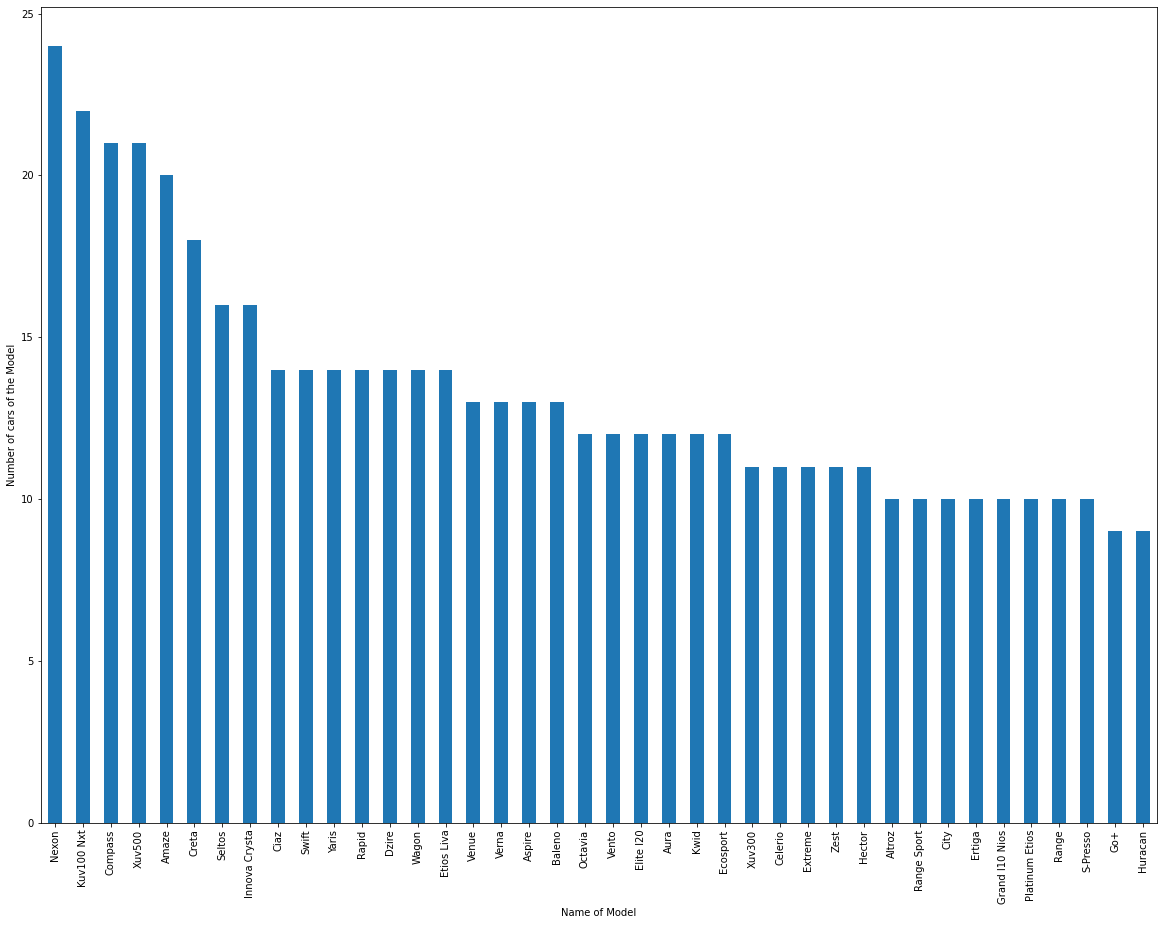

In [1916]:
x=col['Model'].value_counts().head(40).plot(kind='bar',figsize=(20, 15))
x.set_xlabel("Name of Model")
x.set_ylabel("Number of cars of the Model") 


#### Plotting number of Cars in each Price Range

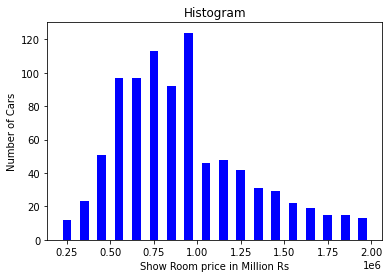

In [1810]:
bins=[200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
plt.hist(col['Ex-Showroom_Price'],bins,histtype='bar',rwidth=0.5,color='b')
plt.xlabel('Show Room price in Million Rs')
plt.ylabel('Number of Cars')
plt.title('Histogram')
# Plotting Number of Cars in each price range
plt.show()


## from the above plot we can estimate that most of the cars are in the range of 10 Lakh Rupees


Text(0.5, 0, 'Body Type')

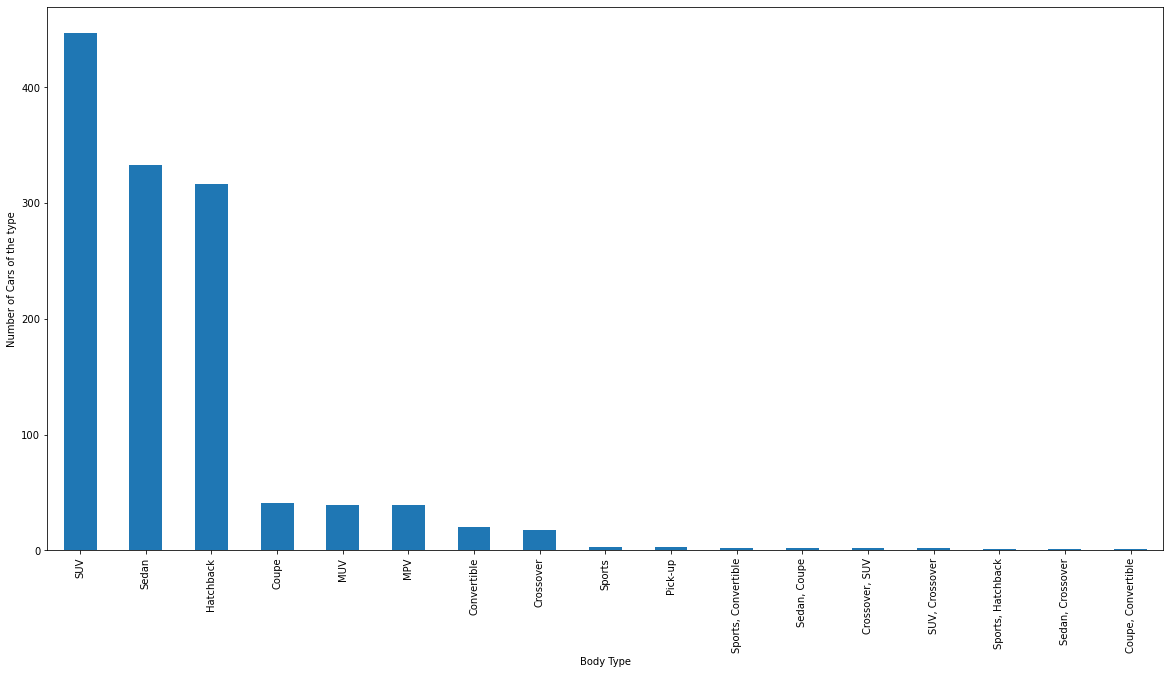

In [1917]:
x=col['Body_Type'].value_counts().head(40).plot(kind='bar',figsize=(20, 10))
x.set_ylabel("Number of Cars of the type")
x.set_xlabel("Body Type") 
#Plotting Number of Cars of Each Body type

### Plotting Power Torque Bootspace and Price against each other

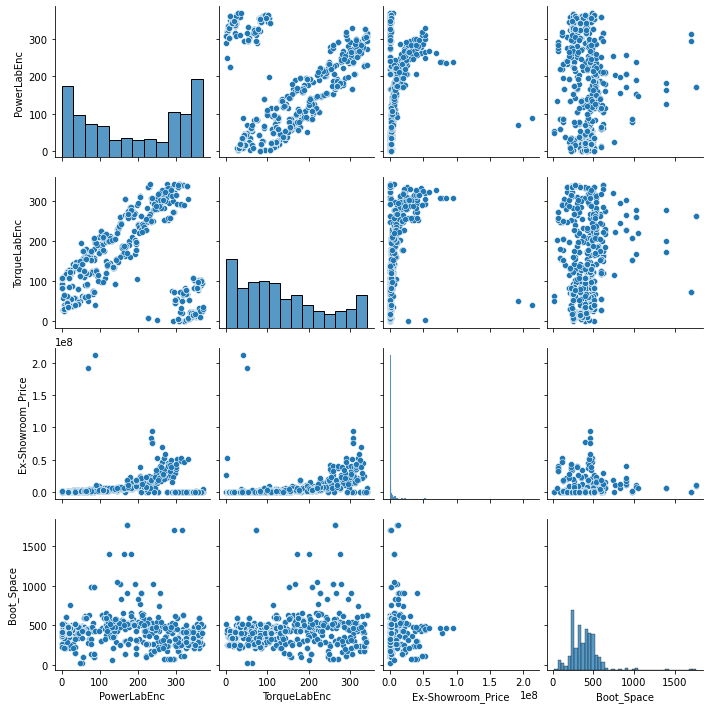

In [1812]:
g = sns.pairplot(col[["PowerLabEnc", "TorqueLabEnc", "Ex-Showroom_Price", "Fuel_Tank_Capacity","Boot_Space"]])

### We observe that with increase in Power and Torque price increases but increase in bootspace doesnot affect price as much

In [1813]:
col.Fuel_Tank_Capacity


0       24 litres
1       24 litres
2       15 litres
3       24 litres
4       24 litres
          ...    
1271    40 litres
1272    40 litres
1273    40 litres
1274    40 litres
1275    88 litres
Name: Fuel_Tank_Capacity, Length: 1276, dtype: object

In [1814]:
col.Fuel_Tank_Capacity=col.Fuel_Tank_Capacity.str.replace('litres',' ')

C:\Users\abbas\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1815]:
col.Fuel_Tank_Capacity

0       24  
1       24  
2       15  
3       24  
4       24  
        ... 
1271    40  
1272    40  
1273    40  
1274    40  
1275    88  
Name: Fuel_Tank_Capacity, Length: 1276, dtype: object

In [1816]:
col.Fuel_Tank_Capacity=pd.to_numeric(col.Fuel_Tank_Capacity)

In [1817]:
col.Fuel_Tank_Capacity

0       24.0
1       24.0
2       15.0
3       24.0
4       24.0
        ... 
1271    40.0
1272    40.0
1273    40.0
1274    40.0
1275    88.0
Name: Fuel_Tank_Capacity, Length: 1276, dtype: float64

### Plotting city mileage against price

(0.0, 27.0)

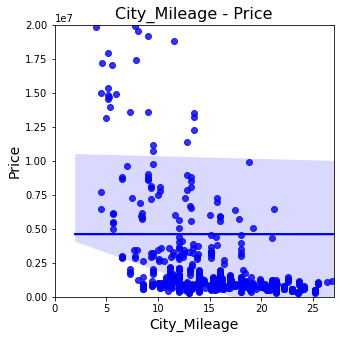

In [1823]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(1)
ax.set_title("City_Mileage - Price", fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot(x='City_Mileage', y='Ex-Showroom_Price',data=col,color='b')
gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('City_Mileage',fontsize=14)
#gax.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax.set_ylim(0,20000000)
gax.set_xlim(0,27)


#### City mileage doesnt affect price that much and price has slightly negative to no correlation with city mileage people who look for better effeciency in fuel might be slightly conscious of their budget

In [1692]:
df['City_Mileage'].describe()

count     1276.000000
mean        42.183911
std        728.205708
min          2.000000
25%         14.500000
50%         23.840000
75%         28.860000
max      26032.000000
Name: City_Mileage, dtype: float64

In [1824]:
df.Height=df.Height.str.replace("mm",' ')
df.Height=pd.to_numeric(df.Height)

In [1825]:
df.Height

0       1652.0
1       1652.0
2       1652.0
3       1652.0
4       1652.0
         ...  
1271    1495.0
1272    1495.0
1273    1495.0
1274    1495.0
1275    1900.0
Name: Height, Length: 1276, dtype: float64

In [1826]:
df.Width=df.Width.str.replace("mm",' ')
df.Width=pd.to_numeric(df.Width)
df.Length=df.Length.str.replace("mm",' ')
df.Length=pd.to_numeric(df.Length)

### Comparing Length Width and Price of Car

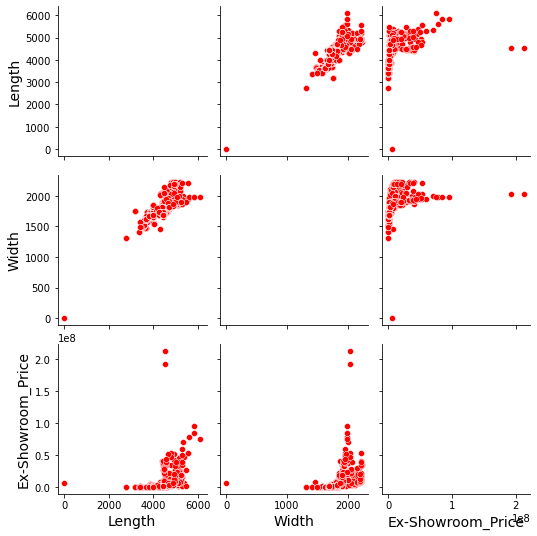

In [1827]:
gplt=sns.pairplot(df[['Length','Width','Ex-Showroom_Price']], kind="scatter",diag_kind='scatter',diag_kws=dict(color='b', linewidth=2),plot_kws=dict(color='r'))

xlabels,ylabels = [],[]

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

## With increase in length and width the price of car rises as bigger cars are relatively safer

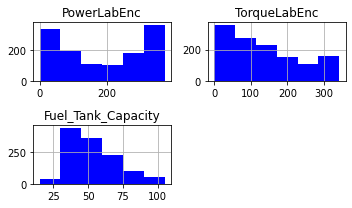

In [1726]:
col[['PowerLabEnc','TorqueLabEnc','Fuel_Tank_Capacity']].hist(figsize=(5,3),bins=6,color='Blue')
plt.tight_layout()
plt.show()